## Import packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
tf.__version__

'1.10.0'

## Load Data

In [16]:
#from .mnist import  MNIST
from TF.mnist import MNIST
data = MNIST()

print('-Training-set:\t\t{}'.format(data.num_train))
print('-Validation-set:\t\t{}'.format(data.num_val))
print('-Test-set:\t\t{}'.format(data.num_test))

-Training-set:		55000
-Validation-set:		5000
-Test-set:		10000


In [17]:
img_size_flat = data.img_size_flat
img_shape = data.img_shape
num_classes = data.num_classes

print(img_size_flat)
print(img_shape)
print(num_classes)

784
(28, 28)
10


In [19]:
data.y_test[0:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [24]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        
        if cls_pred is None:
            xlabel = 'True: {0}'.format(cls_true[i])
        else:
            xlabel = 'True: {0}, Pred:{1}'.format(cls_true[i], cls_pred[i])
        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

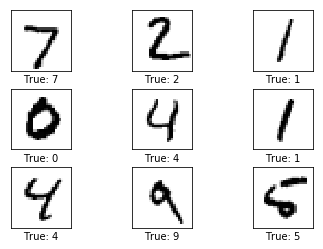

In [25]:
images = data.x_test[0:9]
cls_true = data.y_test_cls[0:9]

plot_images(images=images, cls_true=cls_true)

In [26]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

logits = tf.matmul(x, weights) + biases

y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

correct_prediction = tf.equal(y_pred_cls, y_true_cls)

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [27]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

In [ ]:
batch_size = 100

def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch, y_true_batch, _ = data.random_batch(batch_size=batch_size)
        feed_dict_train = {x: x_batch, y_true: y_true_batch}
        sess.run(optimizer, feed_dict=feed_dict_train)



In [30]:
feed_dict_test = {
    x: data.x_test,
    y_true: data.y_test,
    y_true_cls: data.y_test_cls
}

In [31]:
def print_accuracy():
    acc = sess.run(accuracy, feed_dict=feed_dict_test)
    print('Accuracy on test-set: {0:.1%}'.format(acc))

In [32]:
def print_confusion_matrix():
    cls_true = data.y_test_cls
    cls_pred = sess.run(y_pred_cls, feed_dict=feed_dict_test)
    
    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange((num_classes))
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.show()

In [33]:
print_accuracy()

Accuracy on test-set: 9.8%
